## Prediction of quality using supervised learning

### The dataset gives a set of white wine data with physicochemical (inputs) and sensory (output) variables. This dataset can be viewed as classification or regression tasks. The classes are ordered and not balanced.

### In order to analyse the data, we build a simple classification model using Keras API running on top of TensorFlow.

In [40]:
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.regularizers import l2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [41]:
data = pd.read_csv('data/winequality-white.csv', delimiter=';')

In [42]:
data.head()

x = data.drop(columns=['quality'])
y = data['quality']
y=pd.get_dummies(pd.Series(y))

### The input features and output has been separated into x & y variables. By a validation set, the model is tuned by checking if the model is underfit, overfit or well generalised

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=0)

In [44]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((3428, 11), (3428, 7), (1470, 11), (1470, 7))

### A Sequential model is built, which is a linear stack of layers. This model is created by passing a list of layer instances to the constructor one at a time.

In [45]:
model = Sequential()

### A fully-connected structure with 3 layers including 2 hidden layers with 100 nodes each and 1 output layer with a single node is used. Fully connected layers are defined using the Dense class. The number of layers and number of nodes are chosen to be large enough to capture the trends/structure of the data. Since this is a binary classification, relu is used for the hidden layer and softmax is used for the output layer.¶

In [46]:
model.add(Dense(100,activation='relu',input_dim=11,kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

In [47]:
model.add(Dense(100,activation = 'relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

In [48]:
model.add(Dense(7,activation='softmax'))

### Loss function is to be mentioned. Here 'binary_crossentropy', which is negative log-Loss is used as the loss_function. For training the model, ‘Adam’ (Adaptive Moment Estimation) optimizer has been used since Adam adopts the learning rate as the training progresses (adaptive learning rates) and converges fast.¶

In [49]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

### The trainable parameter details of the model are given below. The first layer has 1200 parameters and the second layer has 10100 parameters. The total number of trainable parameters is 12007.

In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               1200      
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 7)                 707       
Total params: 12,007
Trainable params: 12,007
Non-trainable params: 0
_________________________________________________________________


### Fit method is used to train the model with the training set (x_train,y_train). Verbose is set to 1 to turn off the log output from each epoch. The number of epochs is set to 15. Batch size is set depending on the amount of data, and it determines the number of training examples utilized in one iteration.

In [51]:
model_output = model.fit(x_train,y_train,epochs=15,batch_size=20,verbose=1,validation_data=(x_test,y_test),)

Train on 3428 samples, validate on 1470 samples
Epoch 1/15
3428/3428 [==============================] - 1s 336us/step - loss: 1.9475 - acc: 0.8108 - val_loss: 0.7386 - val_acc: 0.8573
Epoch 2/15
3428/3428 [==============================] - 0s 121us/step - loss: 0.7500 - acc: 0.8441 - val_loss: 0.6472 - val_acc: 0.8571
Epoch 3/15
3428/3428 [==============================] - 0s 122us/step - loss: 0.6226 - acc: 0.8505 - val_loss: 0.5787 - val_acc: 0.8571
Epoch 4/15
3428/3428 [==============================] - 0s 122us/step - loss: 0.5585 - acc: 0.8536 - val_loss: 0.5272 - val_acc: 0.8569
Epoch 5/15
3428/3428 [==============================] - 0s 122us/step - loss: 0.5077 - acc: 0.8550 - val_loss: 0.4815 - val_acc: 0.8569
Epoch 6/15
3428/3428 [==============================] - 0s 122us/step - loss: 0.4685 - acc: 0.8553 - val_loss: 0.4463 - val_acc: 0.8571
Epoch 7/15
3428/3428 [==============================] - 0s 124us/step - loss: 0.4330 - acc: 0.8546 - val_loss: 0.4171 - val_acc: 0.8566


### The model training and validation accuracy are shown below. The training accuracy from the last epoch is around 85.52 and validation accuracy is 85.71. Average training accuracy over all the epochs is around 85.11% and average validation accuracy is 85.67%.

In [52]:
print('Training Accuracy : ' , np.mean(model_output.history["acc"]))
print('Validation Accuracy : ' , np.mean(model_output.history["val_acc"]))

Training Accuracy :  0.8511363073992201
Validation Accuracy :  0.8567346528273861


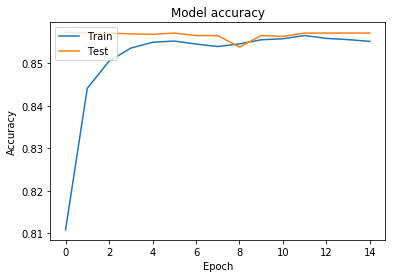

In [53]:
plt.plot(model_output.history['acc'])
plt.plot(model_output.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

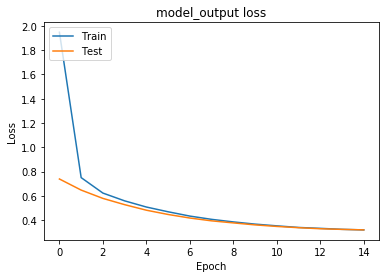

In [54]:
plt.plot(model_output.history['loss'])
plt.plot(model_output.history['val_loss'])
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()